In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)

In [9]:
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

## Control 3: Regresión con variables continuas y categóricas

Jerónimo Aranda 150344  
Emiliano Zambrano 157043  
Jorge Rotter  158391

### Análisis exploratorio (1,2)

In [112]:
dat = [i.strip().split() for i in open("bacterias.dat").readlines()]
df=pd.DataFrame(dat[1:],columns=dat[0])
df['Temp']=df['Temp'].astype(int)
df['Nbact']=df['Nbact'].astype(int)
df.head()

,obs,Temp,Acid,Conc,Nbact
0,1,30,B,L,93
1,2,30,B,L,95
2,3,30,B,L,96
3,4,30,B,L,94
4,5,30,B,L,94


Text(0.5, 0, 'Temperatura')

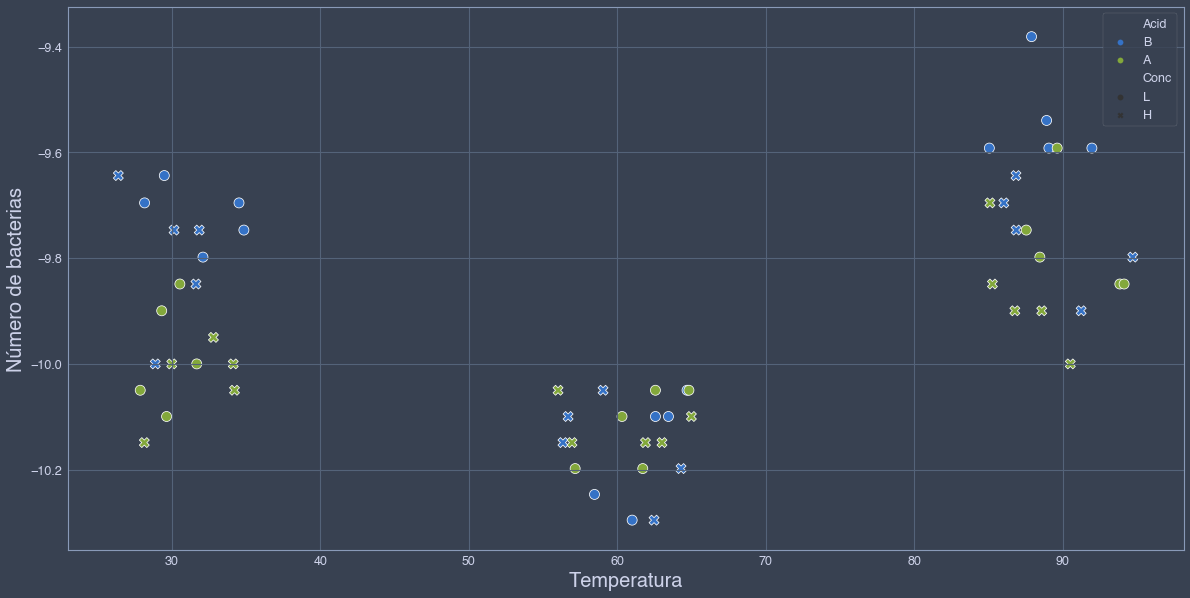

In [120]:
df['Temp_num'] = df.Temp +np.random.rand(df.shape[0])*10-5
df['y'] = -np.sqrt(df.Nbact)
ax = sns.scatterplot(x="Temp_num", y="y",s=100,
                      hue="Acid", 
                      legend="full", data=df,style='Conc')
ax.set_ylabel('Número de bacterias',size=20)
ax.set_xlabel('Temperatura',size=20)

In [34]:
df.shape

(60, 6)

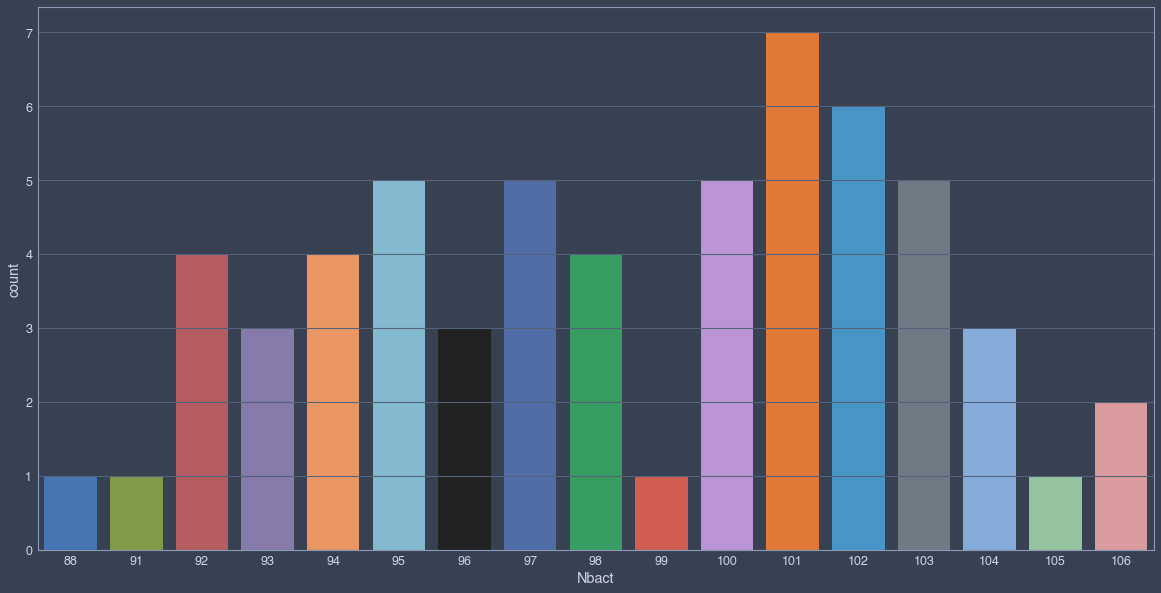

In [37]:
sns.countplot(df.Nbact)

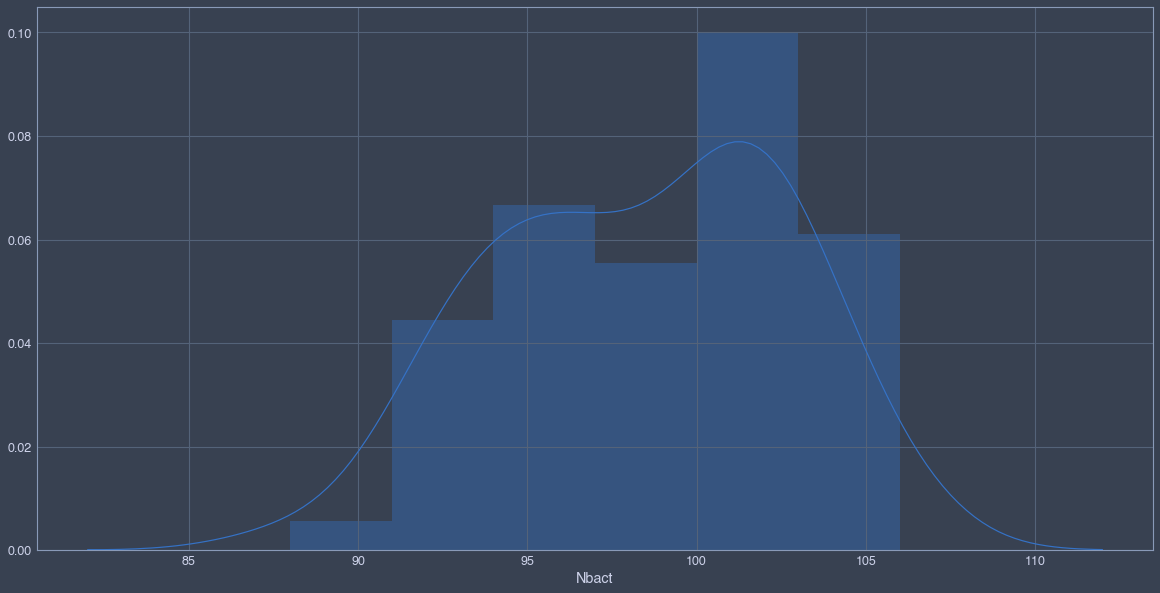

In [47]:
sns.distplot(df.Nbact)

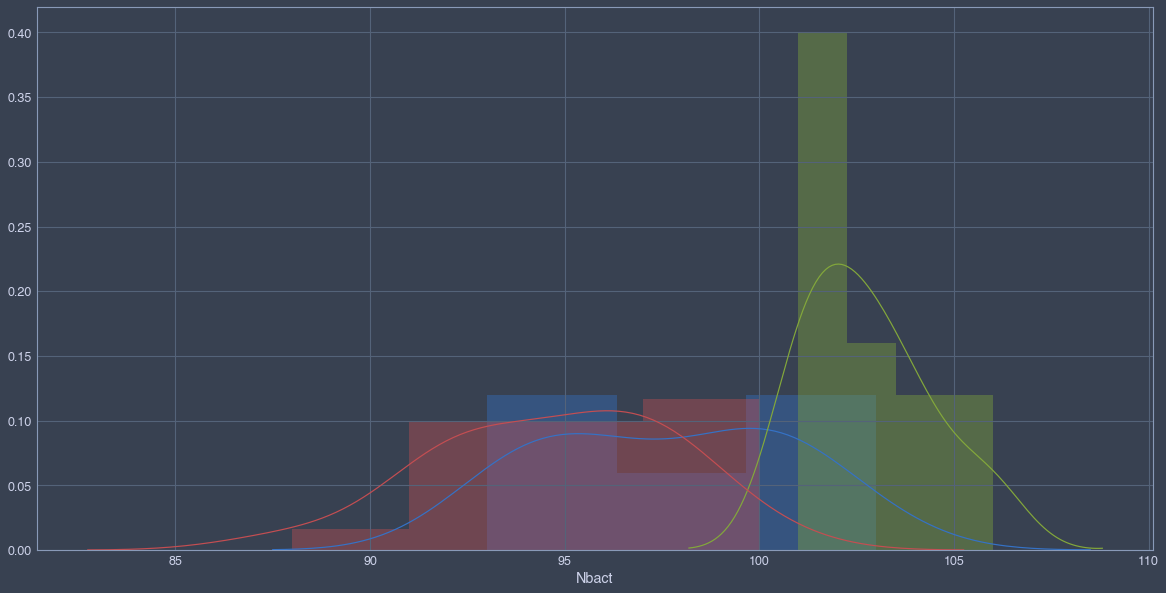

In [46]:
for m in [30, 60, 90]:
    sns.distplot(df[df.Temp==m].Nbact)

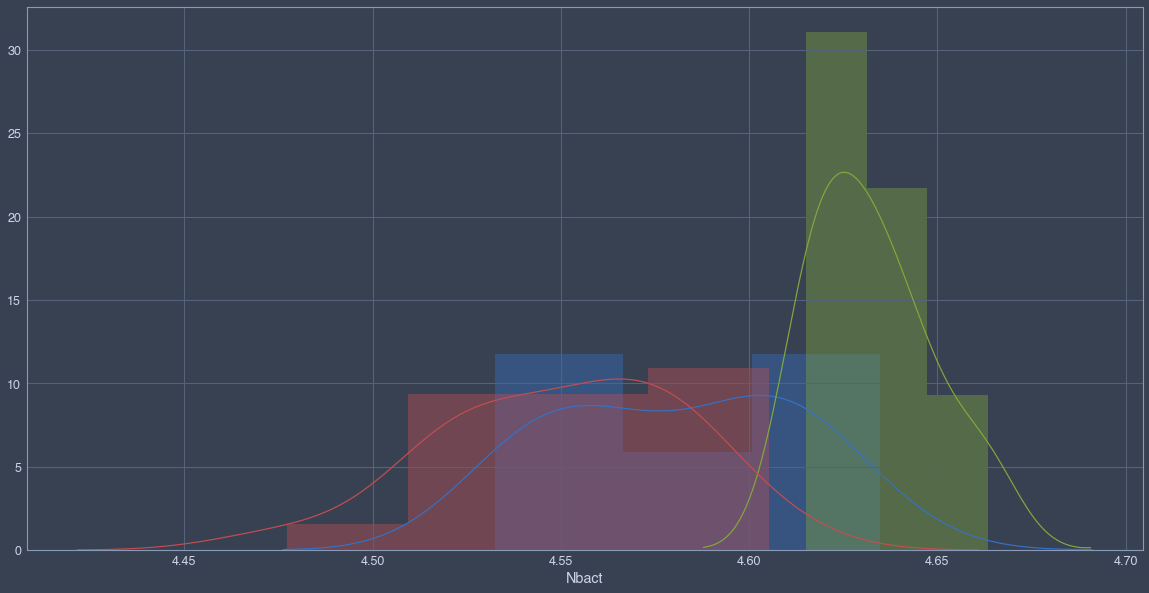

In [48]:
for m in [30, 60, 90]:
    sns.distplot(df[df.Temp==m].Nbact.apply(np.log))

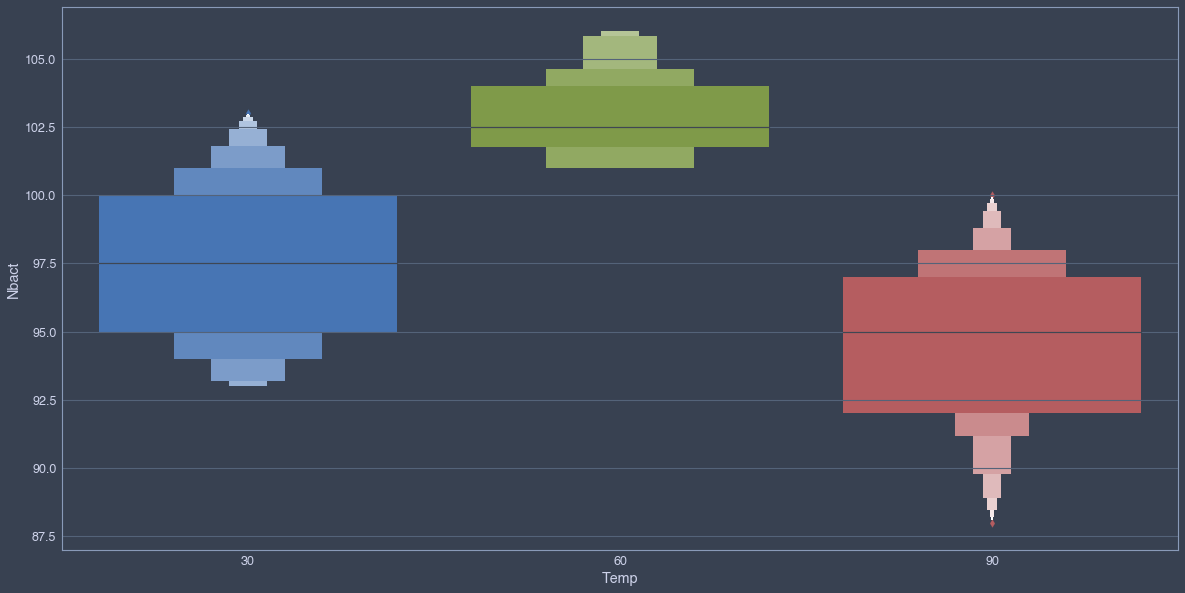

In [60]:
ax=sns.boxenplot(x='Temp', y='Nbact', data=df)

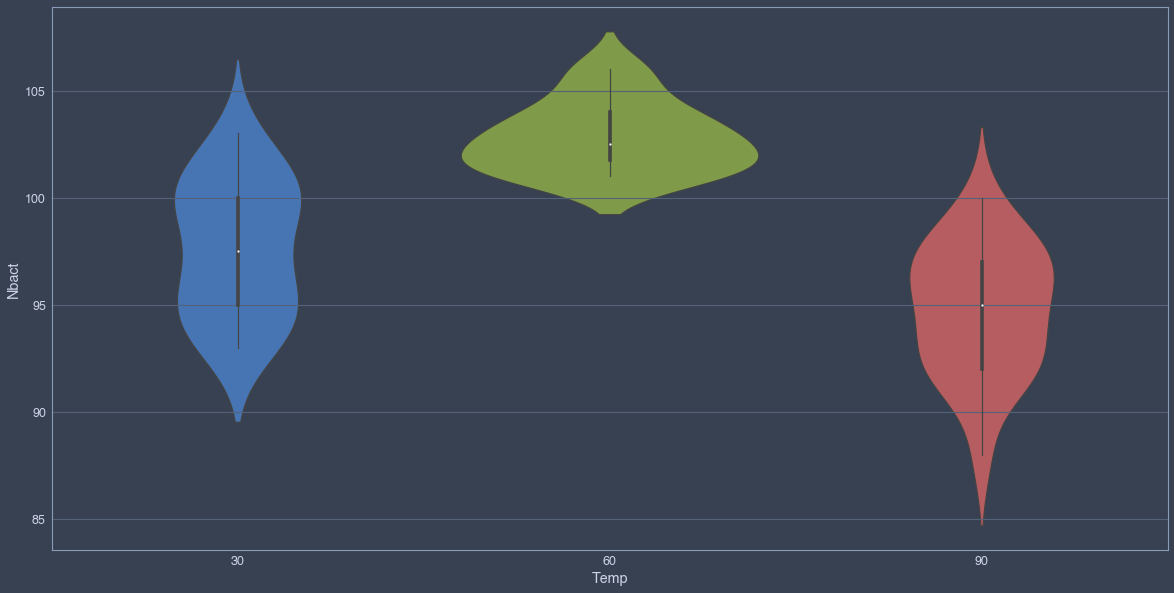

In [62]:
sns.violinplot(x='Temp', y='Nbact', data=df)

Modelo de medias cuadráticas.

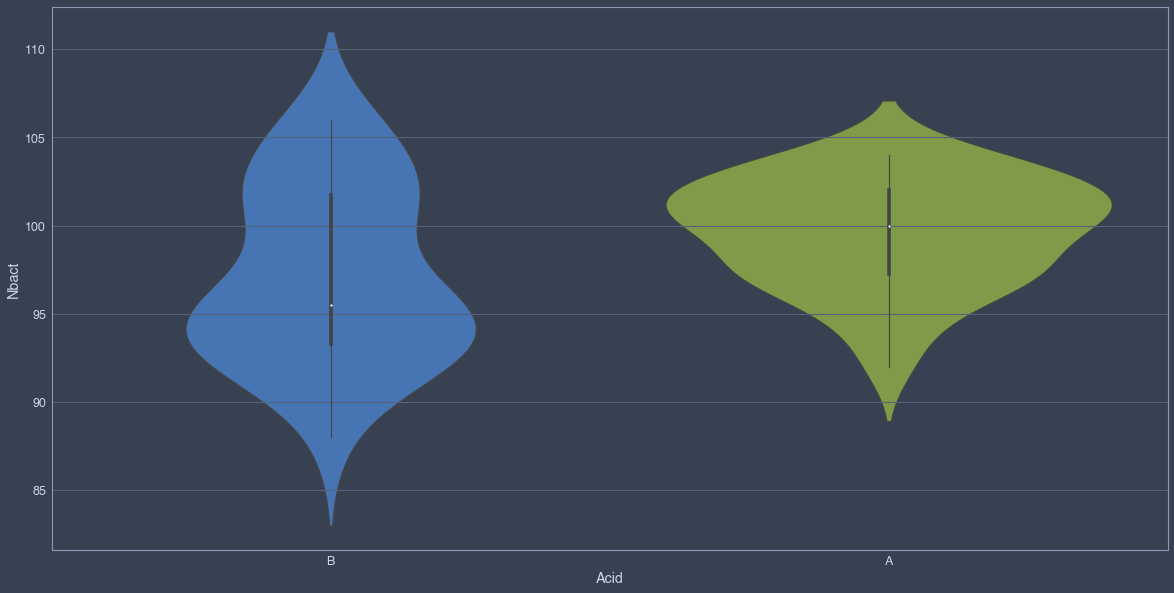

In [65]:
sns.violinplot(x='Acid', y='Nbact', data=df)

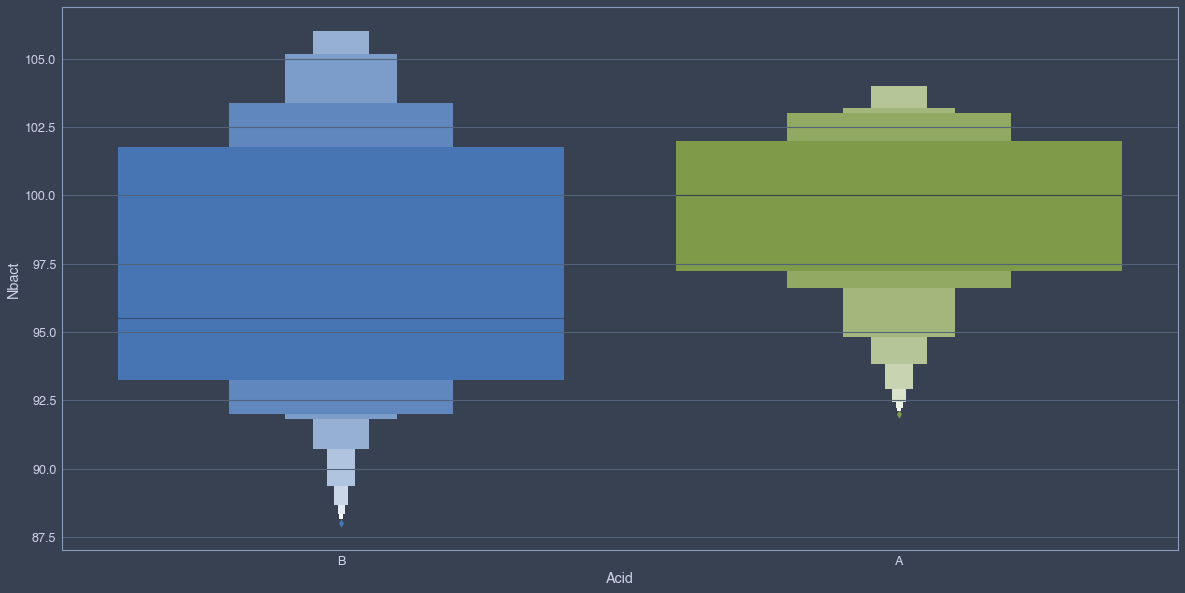

In [64]:
sns.boxenplot(x='Acid', y='Nbact', data=df)

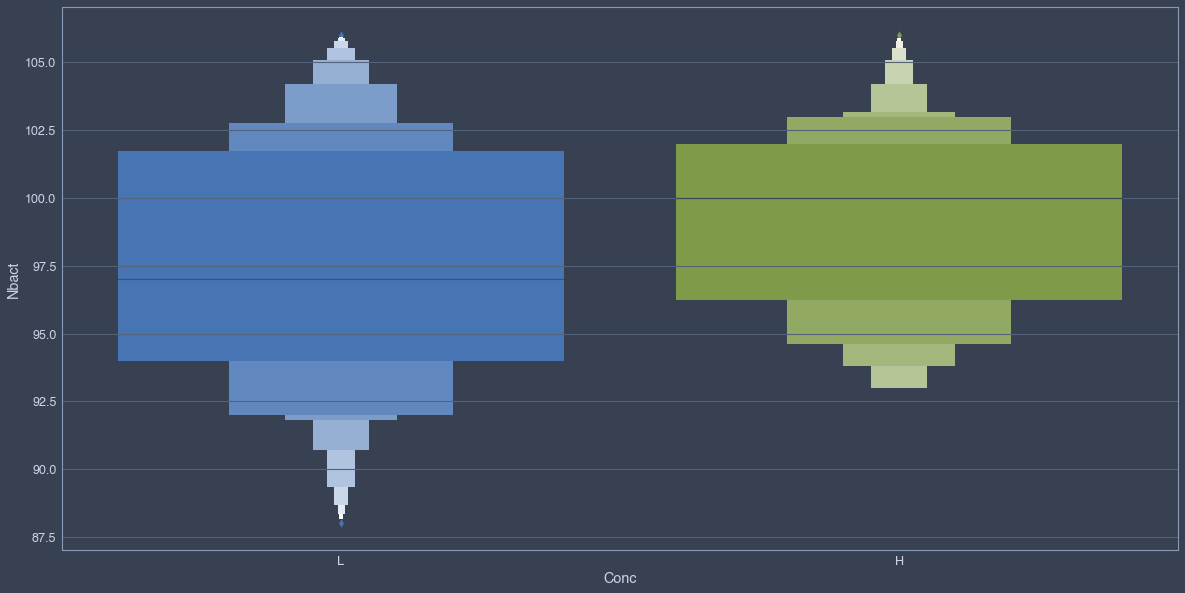

In [76]:
sns.boxenplot(x='Conc', y='Nbact', data=df)

In [80]:
dff

Acid  Conc
A     H       AxesSubplot(0.125,0.125;0.775x0.755)
      L       AxesSubplot(0.125,0.125;0.775x0.755)
B     H       AxesSubplot(0.125,0.125;0.775x0.755)
      L       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

In [86]:
df['cultivo'] = df.Acid.astype(str) + '-' + df.Conc.astype(str)
df.head()

,obs,Temp,Acid,Conc,Nbact,Temp_num,cultivo
0,1,30,B,L,93,31.322010,B-L
1,2,30,B,L,95,33.654257,B-L
2,3,30,B,L,96,33.283262,B-L
3,4,30,B,L,94,29.681153,B-L
4,5,30,B,L,94,31.330418,B-L


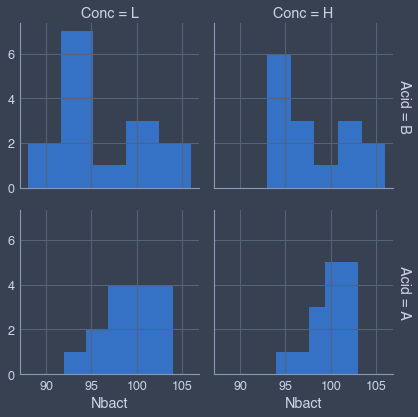

In [104]:
g = sns.FacetGrid(df, row="Acid", col="Conc", margin_titles=True)
g.map(plt.hist, "Nbact", bins=5)

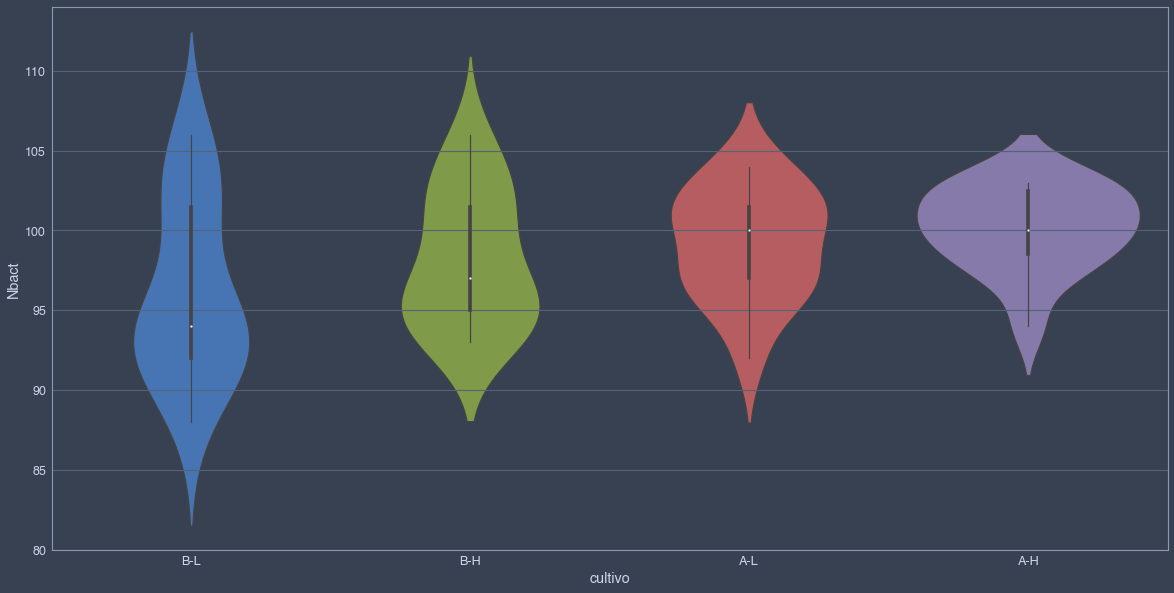

In [95]:
ax = sns.violinplot(x='cultivo', y='Nbact', data=df)

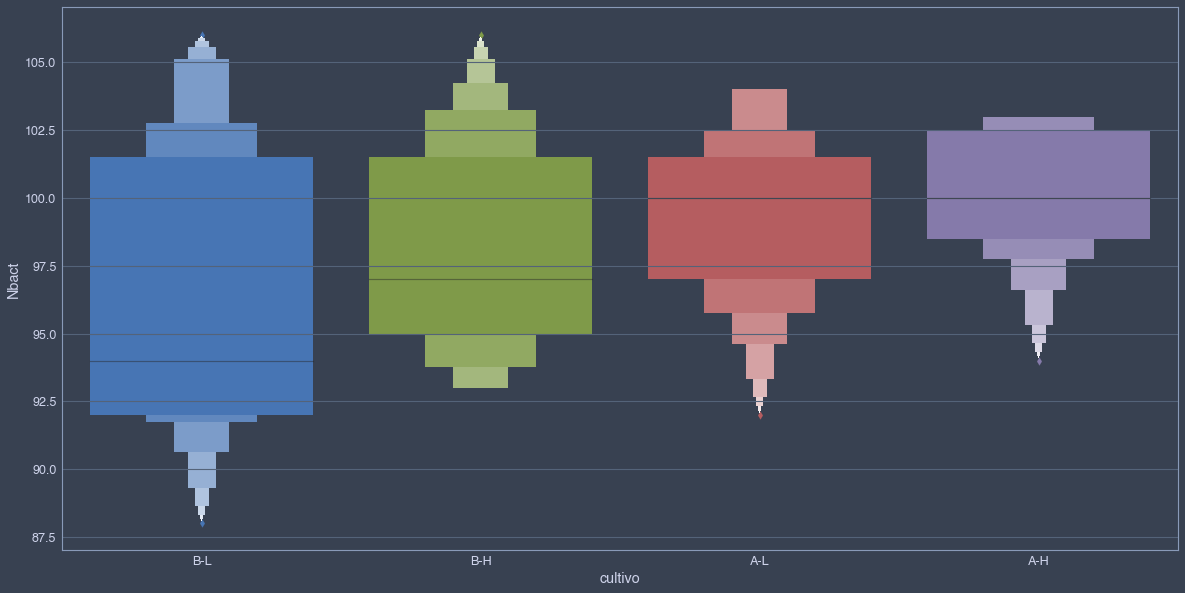

In [97]:
sns.boxenplot(x='cultivo', y='Nbact', data=df)

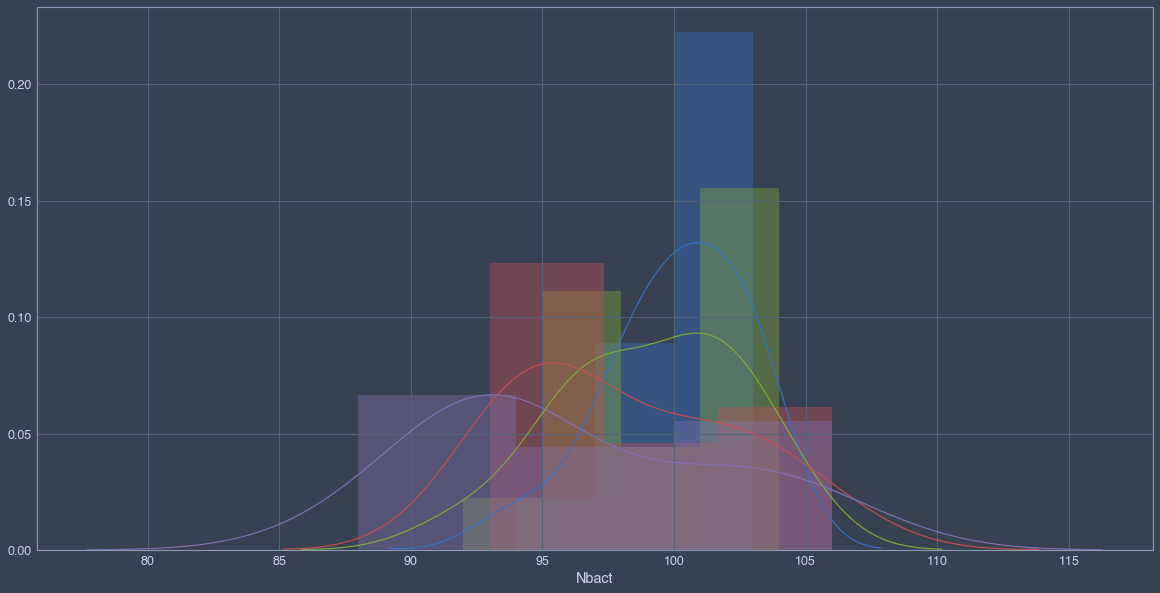

In [82]:
for _, g in df.groupby(['Acid', 'Conc']):
    sns.distplot(g.Nbact)

In [69]:
dff = df.groupby(['Acid', 'Conc']).agg({'Nbact':np.mean}).reset_index()

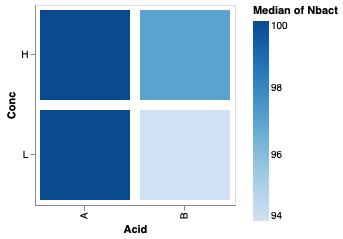

In [77]:
alt.Chart(df).mark_bar().encode(
    x='Acid',
    y='Conc',
    color='median(Nbact)'
).properties(
    width=200,
    height=200
)

In [121]:
df = df['Temp', 'Acid', 'Conc', ]

,obs,Temp,Acid,Conc,Nbact,Temp_num,y
0,1,30,B,L,93,29.489447,-9.643651
1,2,30,B,L,95,34.848208,-9.746794
2,3,30,B,L,96,32.093134,-9.797959
3,4,30,B,L,94,28.160462,-9.695360
4,5,30,B,L,94,34.519138,-9.695360


In [126]:
from statsmodels.formula.api import ols

In [143]:
fit = ols("Nbact ~ C(Temp) * C(Acid)*C(Conc)", data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Nbact   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     23.41
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.23e-15
Time:                        19:51:38   Log-Likelihood:                -116.17
No. Observations:                  60   AIC:                             256.3
Df Residuals:                      48   BIC:                             281.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 100.6000      0.839    119.955      0.000      98.914     102.286
C(Temp)[T.60]                               1.8000      1.186      1.518      0.136      -0.585       4.185
C(Temp)[T.90]                              -3.2000      1.186     -2.698      0.010      -5.585      -0.815
C(Acid)[T.B]                               -4.6000      1.186     -3.878      0.000      -6.985      -2.215
C(Conc)[T.L]                               -1.0000      1.186     -0.843      0.403      -3.385       1.385
C(Temp)[T.60]:C(Acid)[T.B]                  5.4000      1.677      3.219      0.002       2.028       8.772
C(Temp)[T.90]:C(Acid)[T.B]                  2.4000      1.677      1.431      0.159      -0.972       5.772
C(Temp)[T.60]:C(Conc)[T.L]                  1.0000      1.677      0.596      0.554      -2.372       4.372
C(Temp)[T.90]:C(Conc)[T.L]                 -1.0000      1.677     -0.596      0.554      -4.372       2.372
C(Acid)[T.B]:C(Conc)[T.L]                  -0.6000      1.677     -0.358      0.722      -3.972       2.772
C(Temp)[T.60]:C(Acid)[T.B]:C(Conc)[T.L]     0.6000      2.372      0.253      0.801      -4.169       5.369
C(Temp)[T.90]:C(Acid)[T.B]:C(Conc)[T.L]    -1.6000      2.372     -0.675      0.503      -6.369       3.169
==============================================================================
Omnibus:                        0.485   Durbin-Watson:                   2.309
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.612
Skew:                          -0.001   Prob(JB):                        0.736
Kurtosis:                       2.505   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
100*(807-764)/(764)

5.628272251308901

In [125]:
pd.get_dummies(df[['Acid', 'Conc', 'Temp']])#, drop_first=True)

,Temp,Acid_A,Acid_B,Conc_H,Conc_L
0,30,0,1,0,1
1,30,0,1,0,1
2,30,0,1,0,1
3,30,0,1,0,1
4,30,0,1,0,1
5,30,0,1,1,0
6,30,0,1,1,0
7,30,0,1,1,0
8,30,0,1,1,0
9,30,0,1,1,0


In [15]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [109]:
df = df.set_index('obs')

In [110]:
pd.get_dummies(df)

,Temp,Nbact,Temp_num,Acid_A,Acid_B,Conc_H,Conc_L,cultivo_A-H,cultivo_A-L,cultivo_B-H,cultivo_B-L
obs,,,,,,,,,,,
1,30,93,31.322010,0,1,0,1,0,0,0,1
2,30,95,33.654257,0,1,0,1,0,0,0,1
3,30,96,33.283262,0,1,0,1,0,0,0,1
4,30,94,29.681153,0,1,0,1,0,0,0,1
5,30,94,31.330418,0,1,0,1,0,0,0,1
6,30,100,34.143225,0,1,1,0,0,0,1,0
7,30,95,26.413203,0,1,1,0,0,0,1,0
8,30,93,27.804415,0,1,1,0,0,0,1,0
9,30,95,34.697228,0,1,1,0,0,0,1,0


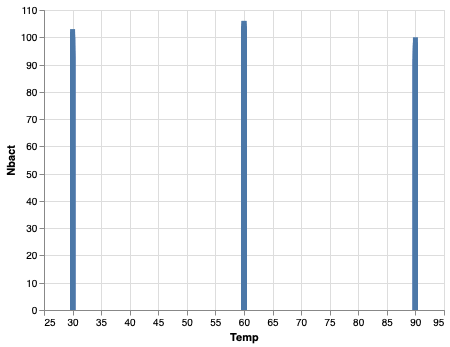

In [27]:
alt.Chart(df).mark_bar().encode(
    x='Temp',
    y='Nbact'
).interactive()

### Propuesta de modelo (3,4,5)

### Conclusiones (6,7)